# Comparing Frequency Distributions



[Here is the link for seaborn](https://seaborn.pydata.org/). This is where the data for this lesson comes from. 

Experienced          25
Little experience    42
Rookie               23
Very experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64


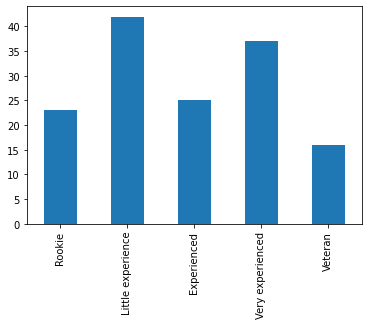

In [1]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')
wnba2 = pd.read_csv('wnba2.csv')

def make_exp_ordinal(row):
    if (0 < row['Experience'] <=3):
        return 'Little experience'
    if (3 < row['Experience'] <= 5):
        return 'Experienced'
    if (5 < row['Experience'] <= 10):
        return 'Very experienced'
    if row['Experience'] > 10:
      return'Veteran'
    else:
        return 'Rookie'

wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)
freq_table = wnba['Exp_ordinal'].value_counts().sort_index()

print(freq_table)
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
C      1
F/C    1
Name: Pos, dtype: int64


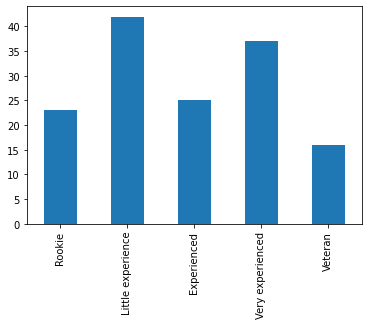

In [3]:
def experienced(value):
    if value == 'R':
        return 'Rookie'
    if 1 <= int(value) <= 3:
        return 'Little experience'
    if 3 < int(value) <= 5:
        return 'Experienced'
    if 5 < int(value) <= 10:
        return 'Very experienced'
    else:
        return 'Veteran'
    
wnba2['Exp_ordinal'] = wnba2['Experience'].apply(experienced)
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n',
      very_xp_distro, '\n\n', veteran_distro)


wnba2['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

***
## Grouped Bar Plots

Because we grouped all the bar plots together, the graph above is called a grouped bar plot. We can generate a grouped bar plot just like the one above using the seaborn.countplot() function from the seaborn module, which you might already be familiar with from our visualization courses. In the code snippet below, we will:
  * Import the seaborn module with the alias sns.
  * Generate the plot with sns.countplot(). We'll use the following parameters for this function:
      * x — specifies as a string the name of the column we want on the x-axis. We'll place the Exp_ordinal column on the x-axis.
      * hue — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the Pos column.
      * data - specifies the name of the variable which stores the data set. We stored the data in a variable named wnba.

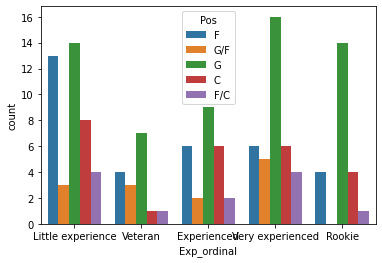

In [6]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba2)

Using `sns.countplot()`, generate a grouped bar plot similar to the one above.
  * Place the `Exp_ordinal` variable on the x-axis.
  * Generate the bar plots for the Pos variable. The data set is stored in wnba variable.
  * Using the `order` parameter of `sns.countplot()`, order the values on the x-axis in ascending order. The `order` parameter takes in a list of strings, so you should use `order = ['Rookie', 'Little experience', ..........]`.
  * Using the `hue_order` parameter, order the bars of each bar plot in ascending alphabetic order. `hue_order` takes in a list of strings, so you can use `hue_order = ['C', 'F', ......]`.


   `NOTE`: I Imported rcParams to add the ability to change the figure size 
  ```Python
  # figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
```

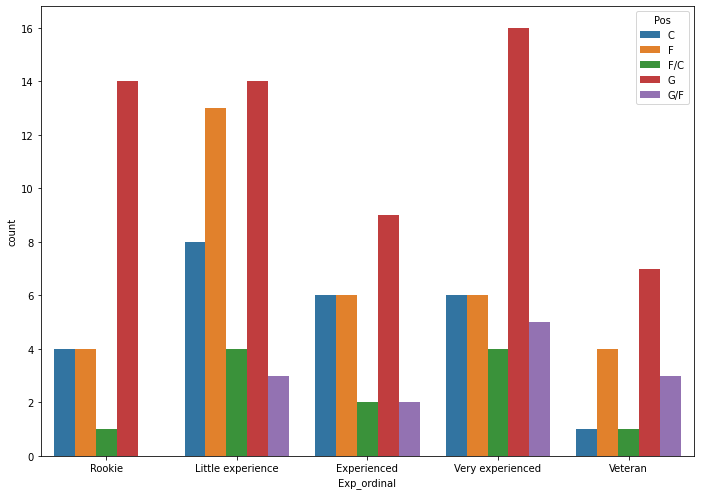

In [12]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x = 'Exp_ordinal', hue='Pos', data = wnba2, order=['Rookie','Little experience', 'Experienced', 'Very experienced', 'Veteran'], hue_order=['C','F','F/C','G','G/F'])

***
## Challenge: Do Older Players Play Less?

  * Generate a grouped bar plot to confirm or reject our hypothesis. Using `sns.countplot()`:
    * Place the `age_mean_relative` variable on the x-axis. The `age_mean_relative` and `min_mean_relative` are already defined.
    * Generate the frequency distributions for the `min_mean_relative` variable.
  * Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string `'confirmation'` to a variable named `result`. If it's a `rejection`, assign the string `'rejection'` to the variable result.

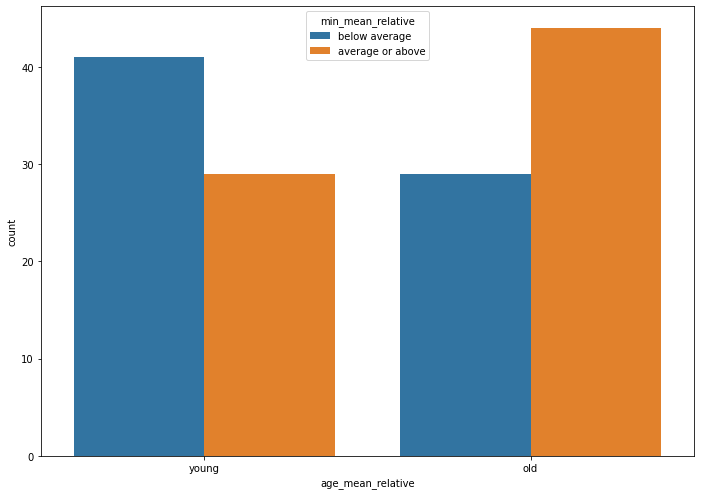

In [14]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)
result = 'rejection'

***
## Comparing Histograms

The easiest way to compare two histograms is to superimpose one on top of the other. We can do that by using the pandas visualization methods we learned in the previous lesson:

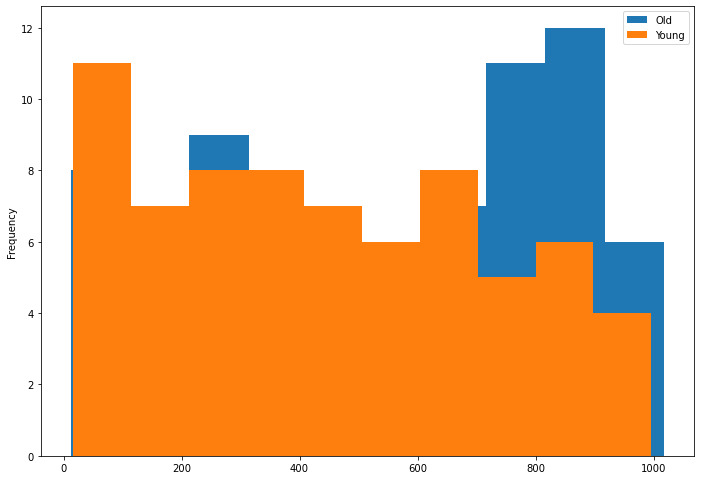

In [15]:
wnba2[wnba2.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba2[wnba2.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can now see that most of the old players that belong to the "average or above" category play significantly more than average. The main downside of the visualization above is that the histogram for young players covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the `histtype` parameter and choose the `'step'` type:

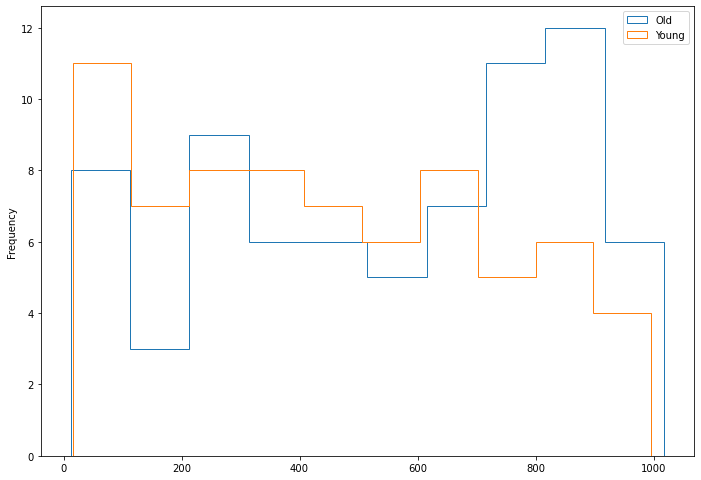

In [16]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the `plt.axvline()` function, add a vertical line to demarcate the average point:
  * The vertical line should be at point 497 on the x-axis.
  * Use the `label` parameter of `plt.axvline()` to label it `'Average'`. Display the label by running `plt.legend()`.
  * Specify `plt.show()` to display the plot.

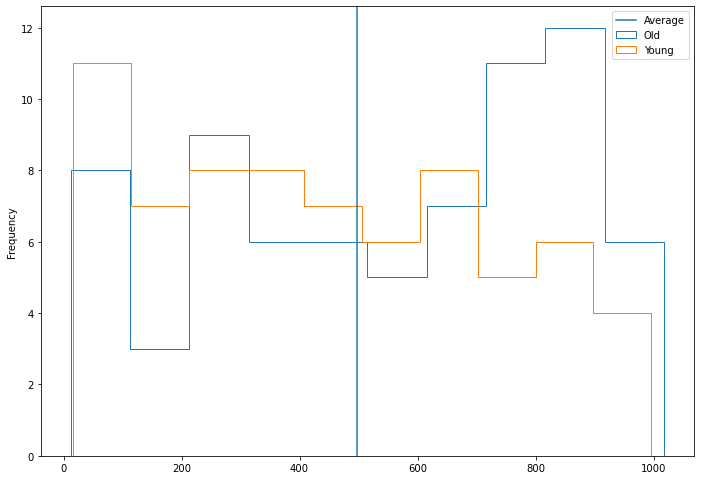

In [18]:
import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

***
## Kernel density Estimate Plots

We can smooth out our two histograms above for old and young players using the `Series.plot.kde()` function:

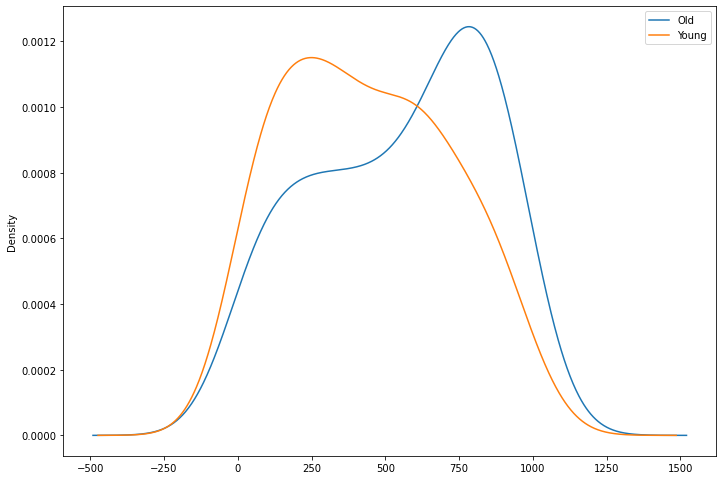

In [19]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

Each of the smoothed histograms above is called a **kernel density estimate plot** or, shorter, **kernel density plot**. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.

* Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.
    * The vertical line should be at point 497 on the x-axis.
    * Label the vertical line `'Average'` and make sure the label is displayed in the legend.
    * Specify `plt.show()` to display the plot.
* Can we still see that most of the old players that belong to the "average or above" category play significantly more than average? If so, is the pattern more obvious (faster to observe) than in the case of the step-type histograms?

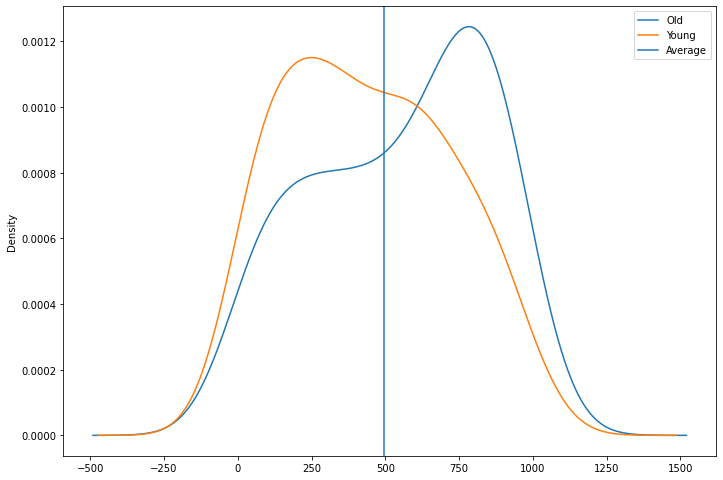

In [20]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

***
## Drawbacks of Kernel Density Plots



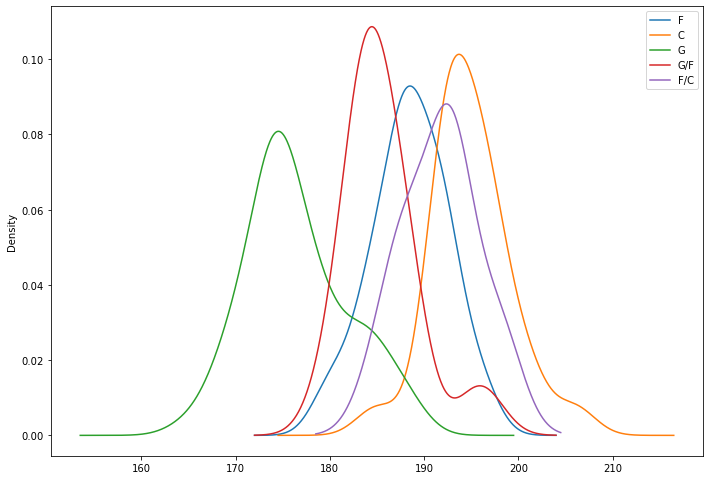

In [21]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way. For the rest of this lesson, we'll explore two such alternatives.

***
## Strip Plots

![Strip](https://s3.amazonaws.com/dq-content/287/s1m5_stripplot_coords.svg)

 After drawing all the bullet points for all the segments, we'll inevitably end up with five narrow vertical strips, one above each unique value on the x-axis. Because of this, each of the five plots is called a **strip plot**.

 To generate the first graph above with five strip plots, we can use the `sns.stripplot()` function from the seaborn module. We place the `Pos` variable on the x-axis and `Height` on the y-axis:

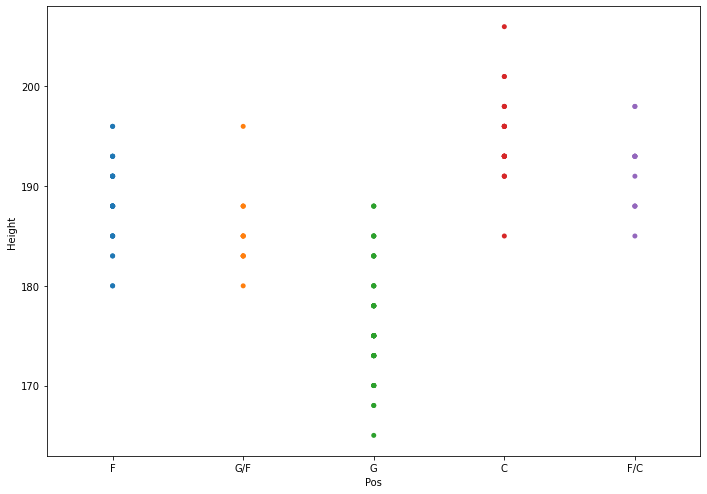

In [29]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter=False)

Here is the same plot with some additions to the look. 

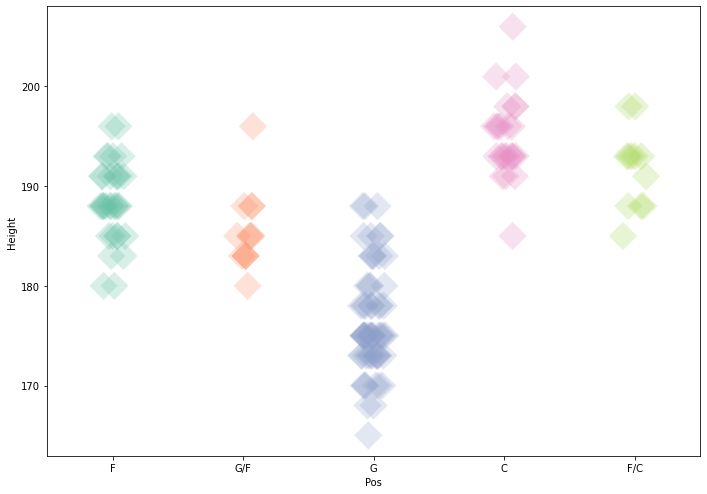

In [30]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, palette='Set2', size=20, marker='D', edgecolor="gray", alpha=.25)

And the same with a violin plot:

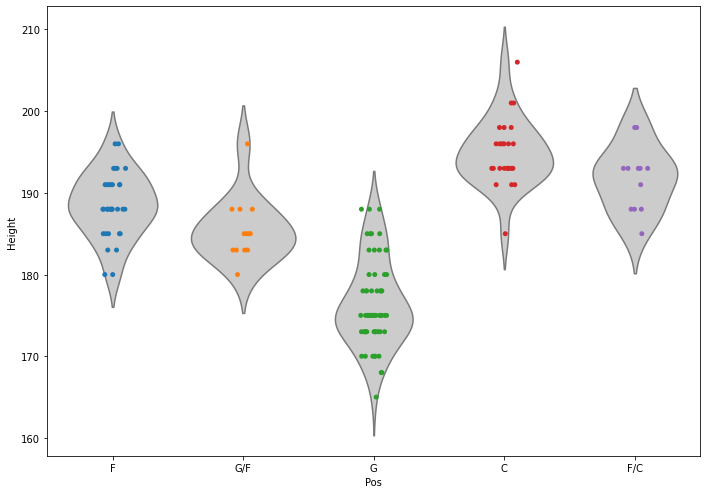

In [31]:
sns.violinplot(x='Pos', y='Height', data=wnba, inner=None, color='.8')
sns.stripplot(x='Pos', y='Height', data=wnba)

A big downside of strip plots is that the bullet points overlap. We can fix this by adding a bit of jitter to each distribution. We can do this by setting the jitter parameter to True:

NOTE you do not have to set the value to True as it is default to true.

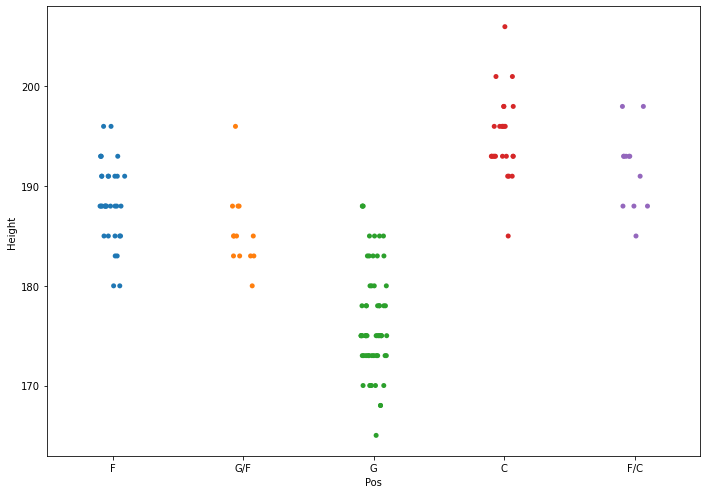

In [32]:
sns.stripplot(x='Pos', y='Height', data=wnba)

NOTE: Strip plots are scatter plots.

* Using strip plots, examine the distribution of player weight (not height) as a function of player position. The graph should have the following properties:
    * The `Pos` variable in on the x-axis and the `Weight` variable on the y-axis.
    * Each strip plot has jitter added to it. The amount of jitter to apply is the one specific to `jitter = True`.
    * Specify `plt.show()` to display the plot.
* Do you see any similarity with the distributions of the `Height` variable? If so, how could this be explained?

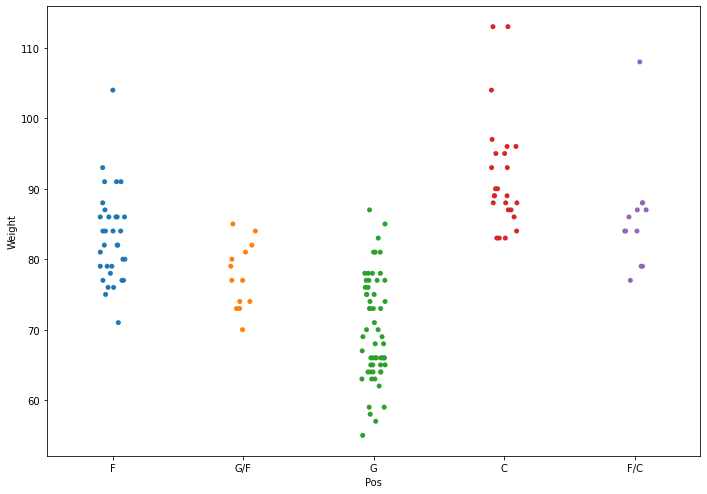

In [37]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

***
## Box Plots

There's another kind of graph we can use to display many distributions at once and make sure everything is still readable. Each individual plot shows a distribution. 

![Box](https://s3.amazonaws.com/dq-content/287/s1m5_hist_to_boxplot.svg)

In a nutshell, the graph on the right shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution:

![Box2](https://s3.amazonaws.com/dq-content/287/s1m5_boxplot_quartiles.svg)

The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker plot**, or, more convenient, just **box plot**.

We can generate the five box plots above using the `sns.boxplot()` function. On the x-axis we want the `Pos` variable, and on the y-axis the `Height` variable.

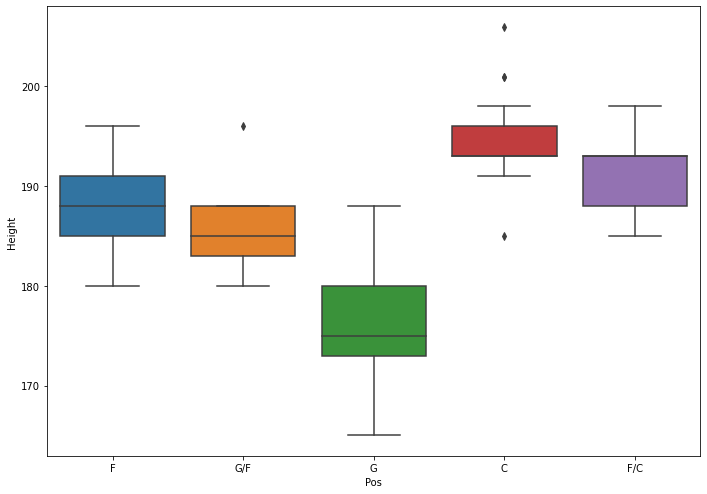

In [38]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

* Using `sns.boxplot()`, generate a series of box plots to examine the distribution of player weight as a function of player position. Place the `Pos` variable on the x-axis and the `Weight` variable on the y-axis.
* Specify `plt.show()` to display the plot.

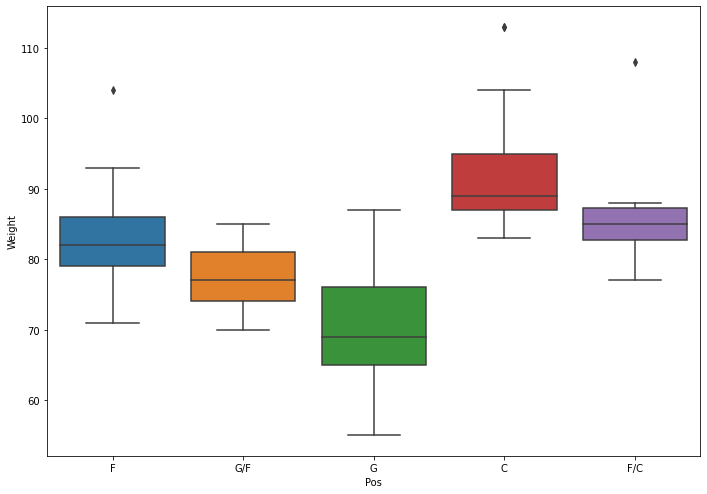

In [39]:
sns.boxplot(x='Pos', y='Weight', data=wnba)
plt.show()

The few dots we see for the box plots of centers and guards/forwards (`G/F`) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an **outlier**.

![Outlier](https://s3.amazonaws.com/dq-content/287/s1m5_outliers.svg)

A value is an outlier if:
* It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the *interquartile* range).
* It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the *interquartile* range).

![interquartile](https://s3.amazonaws.com/dq-content/287/s1m5_interquartile_range.svg)

![IQ2](https://s3.amazonaws.com/dq-content/287/s1m5_centers_boxplot.svg)

From the output of wnba[wnba['Pos'] == 'C']['Height'].describe(), we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.

*interquartile range = upper quartile - lower quartile = 196 - 193 = 3*

When we generate boxplots, we can increase or decrease this factor by using the `whis` parameter of the `sns.boxplot()` function. This is the same height distribution for centers without any outliers:

C:\Users\DerekShain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DerekShain\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


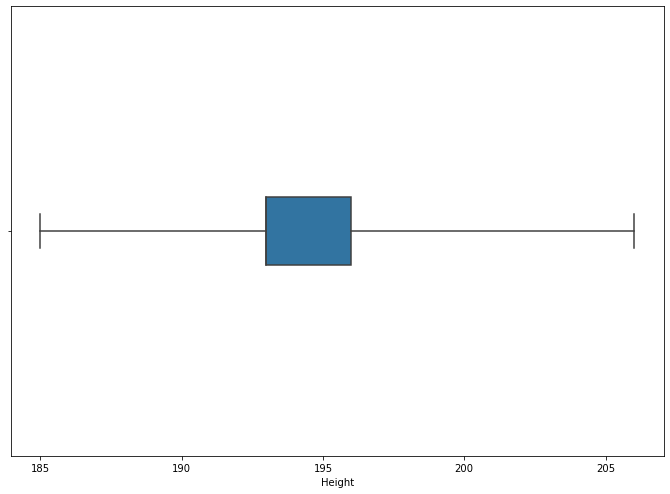

In [40]:
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4, orient = 'vertical', width = .15)

Find the interquartile range, and assign the result to a variable named iqr.

Using a factor of 1.5, calculate the lower and upper bound outside which values are considered outliers.
* Assign the value of the lower bound to a variable named lower_bound.
* Assign the upper bound to a variable named upper_bound.

Find how many values in the distribution are outliers.
* Assign the number of outliers below the lower bound to a variable named outliers_low.
* Assign the number of outliers above the upper bound to a variable named outliers_high.

Plot a boxplot to check whether your answers are sensible.
* Specify plt.show() to display the plot.

C:\Users\DerekShain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


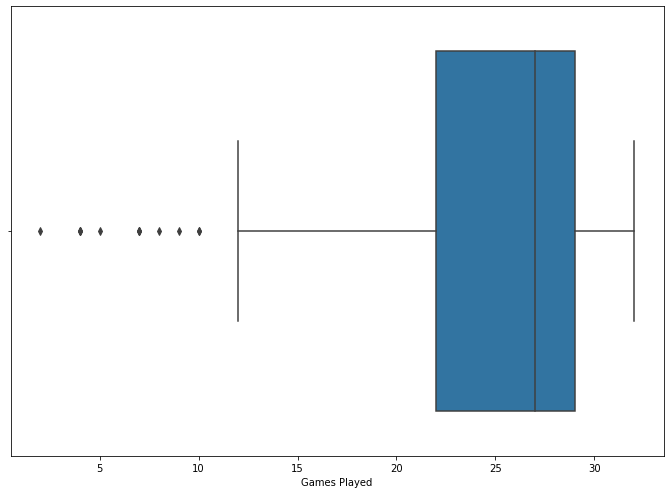

In [41]:
iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)

sns.boxplot(wnba['Games Played'])
plt.show()

***
## Scale of Measurement and graphs

![graph](https://s3.amazonaws.com/dq-content/287/s1m5_summary.svg)